<a href="https://colab.research.google.com/github/Eko079/K-Means-Clustering/blob/main/TugasAkhirKelompok_Proyek_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Data Mining: Analisis Pola Kecelakaan Lalu Lintas Global dengan K-Means Clustering

Proyek ini bertujuan untuk mengidentifikasi dan mengkarakterisasi pola-pola kecelakaan lalu lintas global yang tersembunyi menggunakan algoritma K-Means Clustering. Kami akan mengeksplorasi apakah terdapat kelompok kecelakaan yang cenderung terjadi pada kondisi cuaca atau jalan tertentu, terkait dengan jumlah kendaraan yang terlibat atau tingkat keparahan korban, serta pola waktu tertentu (berdasarkan jam, hari, atau bulan).

---

## Bagian 1: Inisialisasi dan Persiapan Lingkungan

Pada bagian ini, kita akan mempersiapkan lingkungan Google Colab dengan mengimpor semua library Python yang diperlukan dan menghubungkan Google Drive untuk mengakses dataset.

In [ ]:
# 1.1 Import Library yang Diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Untuk visualisasi yang lebih menarik
from sklearn.preprocessing import StandardScaler, LabelEncoder # StandardScaler untuk scaling, LabelEncoder untuk mengubah kategori string menjadi numerik
from sklearn.cluster import KMeans # Algoritma K-Means untuk clustering
from sklearn.metrics import silhouette_score # Metrik evaluasi untuk clustering
from sklearn.decomposition import PCA # Untuk reduksi dimensi dan visualisasi
import os # Untuk interaksi dengan sistem operasi (tidak terlalu esensial di Colab tapi baik disertakan)
import warnings # Untuk mengelola warning
warnings.filterwarnings('ignore') # Mengabaikan warning untuk output yang lebih bersih

In [ ]:
# 1.2 Mengatur Google Drive untuk Akses Dataset
# DiSesuaikan dengan lokasi folder 'Dataset' di Google Drive.
PATH='/content/drive/My Drive/Dataset/'
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# 1.3 Memuat Dataset
try:
    data = pd.read_csv(PATH + 'global_traffic_accidents.csv')
    print("Dataset 'global_traffic_accidents.csv' berhasil dimuat.")
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di {PATH}. Pastikan path dan nama file benar.")

Dataset 'global_traffic_accidents.csv' berhasil dimuat.


In [ ]:
data

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving
...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving


## Bagian 2: Eksplorasi Data Awal (Exploratory Data Analysis - EDA)

Tahap EDA sangat penting untuk memahami struktur, tipe data, dan karakteristik awal dataset. Ini membantu kita mengidentifikasi potensi masalah seperti missing values atau anomali, serta memberikan gambaran awal tentang distribusi fitur-fitur kunci.

In [ ]:
print("\n--- Memulai Bagian 2: Eksplorasi Data Awal (EDA) ---")

# 2.1 Menampilkan beberapa baris pertama data
print("\n2.1 Cuplikan Data Awal:")
print(data.head())


--- Memulai Bagian 2: Eksplorasi Data Awal (EDA) ---

2.1 Cuplikan Data Awal:
  Accident ID        Date   Time           Location   Latitude   Longitude  \
0    b0dd6f57  2023-04-19  06:39      Mumbai, India  13.488432  -73.290682   
1    debfad09  2023-01-17  02:47  São Paulo, Brazil -37.798317  -32.244242   
2    6d69aa36  2024-04-09  02:55  Sydney, Australia  33.767869  104.869018   
3    425bb1f0  2023-10-10  11:23       Tokyo, Japan  -0.378031 -165.825855   
4    90d5cf62  2023-01-02  12:07     Beijing, China  41.254879  -30.776959   

  Weather Condition Road Condition  Vehicles Involved  Casualties  \
0              Snow          Snowy                  5           7   
1             Clear            Icy                  4           1   
2              Rain          Snowy                  1           7   
3             Storm            Wet                  4           0   
4             Storm          Snowy                  3           9   

              Cause  
0  Reckless Dri

In [ ]:
# 2.2 Melihat ringkasan informasi dataset
print("\n2.2 Informasi Dataset:")
data.info()


2.2 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  int64  
 9   Casualties         10000 non-null  int64  
 10  Cause              10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [ ]:
# 2.3 Menampilkan statistik deskriptif
print("\n2.3 Statistik Deskriptif Dataset:")
print(data.describe(include='all'))


2.3 Statistik Deskriptif Dataset:
       Accident ID        Date   Time           Location      Latitude  \
count        10000       10000  10000              10000  10000.000000   
unique       10000         731   1439                 10           NaN   
top       6bd4a011  2023-02-22  07:16  São Paulo, Brazil           NaN   
freq             1          29     17               1032           NaN   
mean           NaN         NaN    NaN                NaN     -0.543557   
std            NaN         NaN    NaN                NaN     51.917928   
min            NaN         NaN    NaN                NaN    -89.985688   
25%            NaN         NaN    NaN                NaN    -45.426619   
50%            NaN         NaN    NaN                NaN     -1.080556   
75%            NaN         NaN    NaN                NaN     44.137309   
max            NaN         NaN    NaN                NaN     89.990081   

           Longitude Weather Condition Road Condition  Vehicles Involved  \


In [ ]:
# 2.4 Mengecek dan memvisualisasikan missing values
print("\n2.4 Status Missing Values per Kolom:")
missing_values = data.isnull().sum()
missing_values_percent = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_values_percent})
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False))


2.4 Status Missing Values per Kolom:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [ ]:
# Visualisasi heatmap missing values
if missing_df['Missing Count'].sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Heatmap Missing Values')
    plt.show()
else:
    print("Tidak ada missing values dalam dataset.")

# 2.5 Menganalisis distribusi awal fitur-fitur kunci

print("\n2.5 Visualisasi Distribusi Fitur Kunci:")

Tidak ada missing values dalam dataset.

2.5 Visualisasi Distribusi Fitur Kunci:


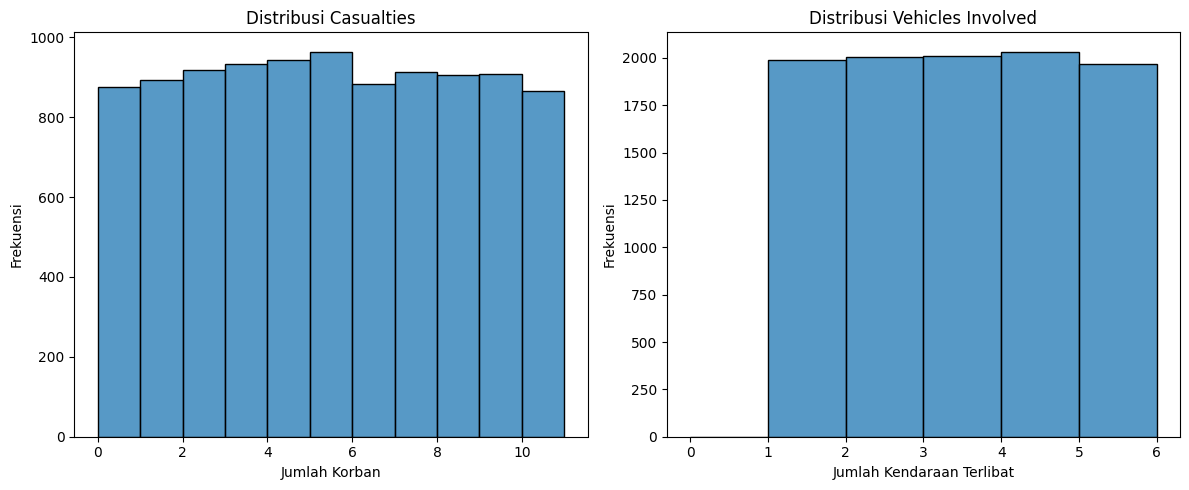

In [ ]:
# Distribusi Casualties dan Vehicles Involved
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Casualties'], bins=range(int(data['Casualties'].max()) + 2), kde=False)
plt.title('Distribusi Casualties')
plt.xlabel('Jumlah Korban')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(data['Vehicles Involved'], bins=range(int(data['Vehicles Involved'].max()) + 2), kde=False)
plt.title('Distribusi Vehicles Involved')
plt.xlabel('Jumlah Kendaraan Terlibat')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

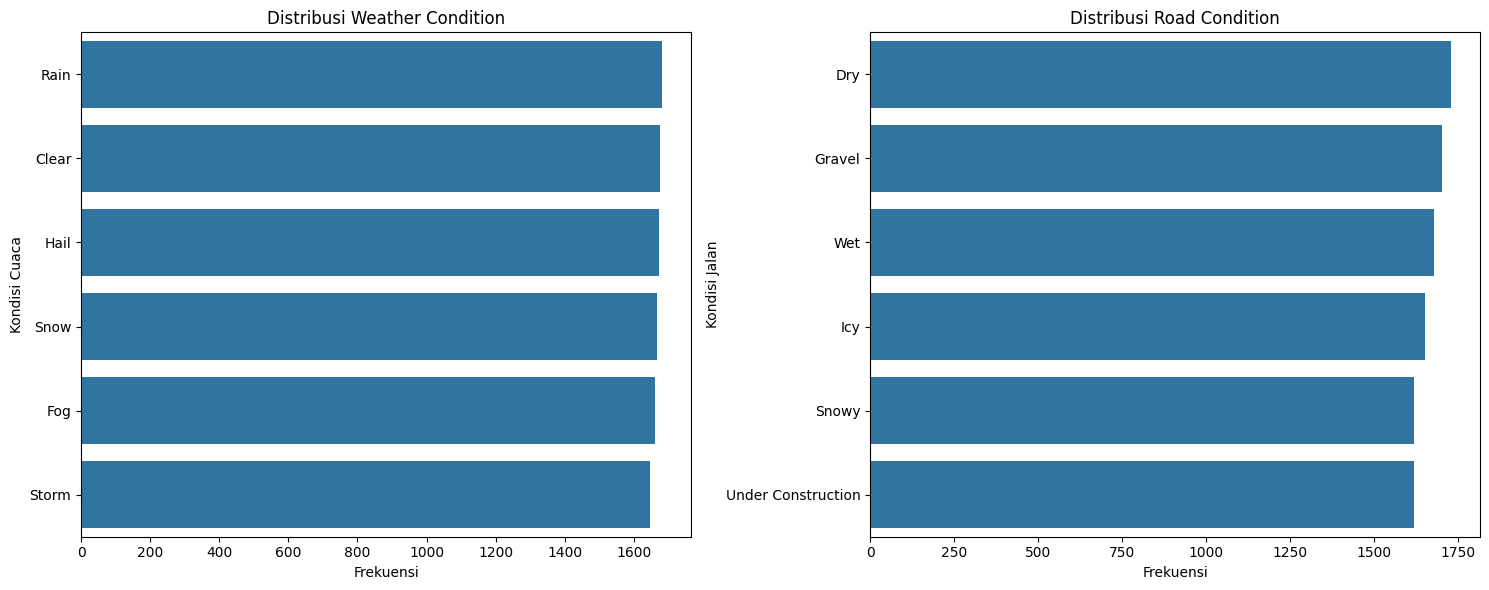

In [ ]:
# Distribusi Kondisi Cuaca dan Jalan
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='Weather Condition', data=data, order=data['Weather Condition'].value_counts().index)
plt.title('Distribusi Weather Condition')
plt.xlabel('Frekuensi')
plt.ylabel('Kondisi Cuaca')

plt.subplot(1, 2, 2)
sns.countplot(y='Road Condition', data=data, order=data['Road Condition'].value_counts().index)
plt.title('Distribusi Road Condition')
plt.xlabel('Frekuensi')
plt.ylabel('Kondisi Jalan')
plt.tight_layout()
plt.show()

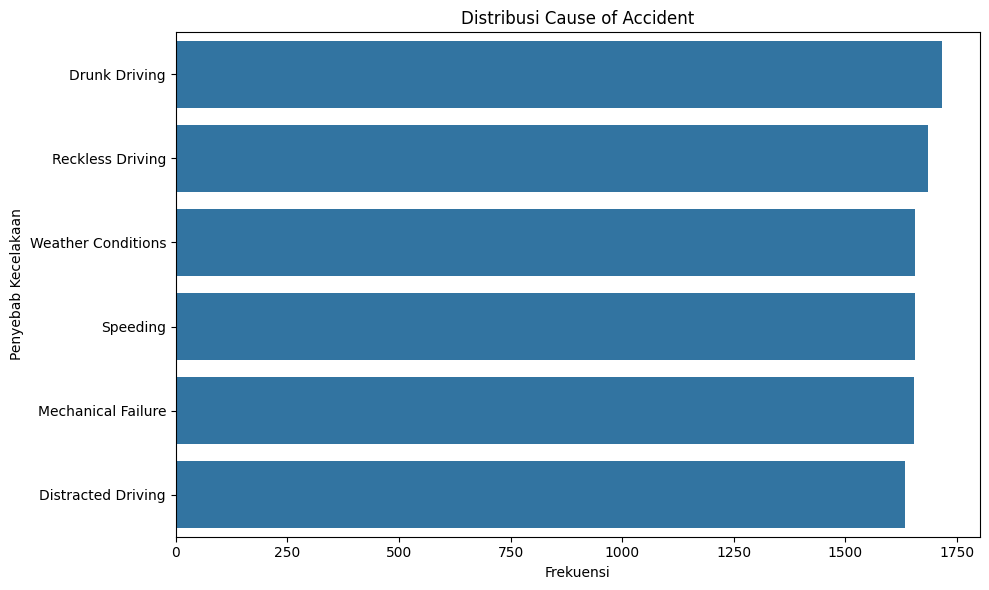

In [ ]:
# Distribusi Cause
plt.figure(figsize=(10, 6))
sns.countplot(y='Cause', data=data, order=data['Cause'].value_counts().index)
plt.title('Distribusi Cause of Accident')
plt.xlabel('Frekuensi')
plt.ylabel('Penyebab Kecelakaan')
plt.tight_layout()
plt.show()

## Bagian 3: Pra-pemrosesan Data (Feature Engineering & Preprocessing for K-Means)

Pada tahap ini, kita akan mengubah data mentah menjadi format yang siap untuk algoritma K-Means. Ini meliputi penanganan missing values, ekstraksi fitur dari data tanggal/waktu, encoding variabel kategorikal, dan scaling fitur numerik.

In [ ]:
print("\n--- Memulai Bagian 3: Pra-pemrosesan Data ---")

# 3.1 Penanganan Missing Values
print("\n3.1 Penanganan Missing Values:")                                          # Mencetak judul untuk bagian penanganan nilai yang hilang.
for column in data.columns:                                                        # Melakukan iterasi melalui setiap kolom dalam DataFrame
    if data[column].isnull().any():                                                # Memeriksa apakah ada nilai yang hilang (NaN) di kolom saat ini.
        if data[column].dtype == 'object':                                         # Jika kolom bertipe objek (biasanya string, menunjukkan kolom kategorikal).
            data[column].fillna(data[column].mode()[0], inplace=True)              # Mengisi nilai yang hilang di kolom kategorikal dengan modus (nilai yang paling sering muncul). # inplace true berarti perubahan dilakukan langsung pada DataFrame.
            print(f"  Missing values di '{column}' diisi dengan modus: {data[column].mode()[0]}")
        else: # Kolom numerik, maksudnya Jika kolom bukan bertipe objek (yaitu, numerik).
            data[column].fillna(data[column].median(), inplace=True)               # Mengisi nilai yang hilang di kolom numerik dengan median (nilai tengah). Median digunakan untuk menghindari pengaruh outlier yang berlebihan dibandingkan dengan mean
            print(f"  Missing values di '{column}' diisi dengan median: {data[column].median()}")   # Mencetak pesan yang menunjukkan kolom mana yang nilai hilang nya diisi dan dengan modus apa.
    else:
        print(f"  Tidak ada missing values di '{column}'")                         # Jika tidak ada nilai yang hilang di kolom, mencetak pesan yang sesuai.

print("\nStatus Missing Values setelah penanganan (total harus 0):")               # Mencetak judul untuk status nilai hilang setelah penanganan.
print(data.isnull().sum().sum())                                                   # Menampilkan jumlah nilai yang hilang untuk setiap kolom setelah proses pengisian. Harapannya, semua harus 0.

# 3.2 Ekstraksi Fitur Waktu dari 'Date' dan 'Time'
print("\n3.2 Ekstraksi Fitur Waktu:")                                              # Mencetak judul untuk bagian ekstraksi fitur waktu.
data['Date'] = pd.to_datetime(data['Date'])                                        # Mengubah kolom 'Date' menjadi format datetime Pandas. Ini penting untuk memungkinkan ekstraksi komponen tanggal.
# Handle cases where 'Time' might be NaT or invalid format
# For simplicity, we'll convert errors to NaT and then fill NaT with a default time (e.g., 00:00:00)
data['Time_processed'] = pd.to_datetime(data['Time'], errors='coerce').fillna(pd.to_datetime('00:00:00').time())  # Ini adalah baris yang sedikit lebih kompleks, pd.to_datatime(data['Time'], errors='coerce') berfungsi untuk mencoba mengubah kolom 'Time' menjadi format datetime. Argumen errors='coerce' akan mengubah semua nilai yang tidak dapat diubah menjadi NaT (Not a Time). fillna(pd.to_datetime('00:00:00').time()): Mengisi nilai NaT yang dihasilkan dari errors='coerce' dengan waktu default '00:00:00'. .time() mengekstrak komponen waktu dari objek datetime. Ini membuat kolom 'Time_processed' berisi objek waktu yang valid.

data['DayOfWeek'] = data['Date'].dt.dayofweek # Senin=0, Minggu=6
data['Month'] = data['Date'].dt.month
data['Hour'] = pd.to_datetime(data['Time_processed']).dt.hour # Mengambil jam dari kolom 'Time_processed'

# Hapus kolom asli yang sudah diproses
data = data.drop(['Date', 'Time', 'Time_processed'], axis=1)
print("Kolom 'Date' dan 'Time' telah diubah menjadi 'DayOfWeek', 'Month', dan 'Hour'.")
print(data.head())


--- Memulai Bagian 3: Pra-pemrosesan Data ---

3.1 Penanganan Missing Values:
  Tidak ada missing values di 'Accident ID'
  Tidak ada missing values di 'Date'
  Tidak ada missing values di 'Time'
  Tidak ada missing values di 'Location'
  Tidak ada missing values di 'Latitude'
  Tidak ada missing values di 'Longitude'
  Tidak ada missing values di 'Weather Condition'
  Tidak ada missing values di 'Road Condition'
  Tidak ada missing values di 'Vehicles Involved'
  Tidak ada missing values di 'Casualties'
  Tidak ada missing values di 'Cause'

Status Missing Values setelah penanganan (total harus 0):
0

3.2 Ekstraksi Fitur Waktu:
Kolom 'Date' dan 'Time' telah diubah menjadi 'DayOfWeek', 'Month', dan 'Hour'.
  Accident ID           Location   Latitude   Longitude Weather Condition  \
0    b0dd6f57      Mumbai, India  13.488432  -73.290682              Snow   
1    debfad09  São Paulo, Brazil -37.798317  -32.244242             Clear   
2    6d69aa36  Sydney, Australia  33.767869  104.869

In [ ]:
# 3.3 Pemilihan Fitur untuk Clustering
# Kita akan memilih fitur-fitur yang relevan dan dapat diukur untuk clustering.
# 'Accident ID' adalah pengidentifikasi unik dan tidak relevan untuk clustering.
# 'Location' (string) juga sangat bervariasi dan tidak cocok untuk encoding sederhana,
# meskipun Latitude dan Longitude akan digunakan.
# 'Cause' adalah label hasil dari klasifikasi, kita tidak menggunakannya untuk clustering (unsupervised).
features_for_clustering = [
    'Latitude', 'Longitude', 'Weather Condition', 'Road Condition',
    'Vehicles Involved', 'Casualties', 'DayOfWeek', 'Month', 'Hour'
]
X = data[features_for_clustering].copy() # Buat salinan agar tidak memodifikasi DataFrame asli sembarangan
print(f"\n3.3 Fitur yang Dipilih untuk Clustering ({len(features_for_clustering)} kolom):")
print(X.head())

# 3.4 Encoding Variabel Kategorikal
print("\n3.4 Encoding Variabel Kategorikal:")
categorical_cols_to_encode = ['Weather Condition', 'Road Condition']
# Lakukan Label Encoding untuk kolom kategorikal yang dipilih
for col in categorical_cols_to_encode:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    print(f"  Kolom '{col}' telah di-encode.")

print("Data setelah encoding:")
print(X.head())
print(X.info())

# 3.5 Scaling Fitur Numerik
# Ini penting untuk K-Means karena algoritmanya berbasis jarak.
print("\n3.5 Scaling Fitur Numerik:")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Data telah distandarisasi (scaled).")
print(X_scaled_df.head())


3.3 Fitur yang Dipilih untuk Clustering (9 kolom):
    Latitude   Longitude Weather Condition Road Condition  Vehicles Involved  \
0  13.488432  -73.290682              Snow          Snowy                  5   
1 -37.798317  -32.244242             Clear            Icy                  4   
2  33.767869  104.869018              Rain          Snowy                  1   
3  -0.378031 -165.825855             Storm            Wet                  4   
4  41.254879  -30.776959             Storm          Snowy                  3   

   Casualties  DayOfWeek  Month  Hour  
0           7          2      4     6  
1           1          1      1     2  
2           7          1      4     2  
3           0          1     10    11  
4           9          0      1    12  

3.4 Encoding Variabel Kategorikal:
  Kolom 'Weather Condition' telah di-encode.
  Kolom 'Road Condition' telah di-encode.
Data setelah encoding:
    Latitude   Longitude  Weather Condition  Road Condition  \
0  13.488432  -73.

## Bagian 4: Menentukan Jumlah Cluster Optimal (Metode Elbow)

Menentukan jumlah cluster (nilai `k`) yang optimal adalah langkah krusial dalam K-Means. Kami akan menggunakan metode Elbow, yang melibatkan perhitungan Within-Cluster Sum of Squares (WCSS) untuk berbagai nilai `k` dan mencari titik "siku" pada grafik.


--- Memulai Bagian 4: Menentukan Jumlah Cluster Optimal (Metode Elbow) ---


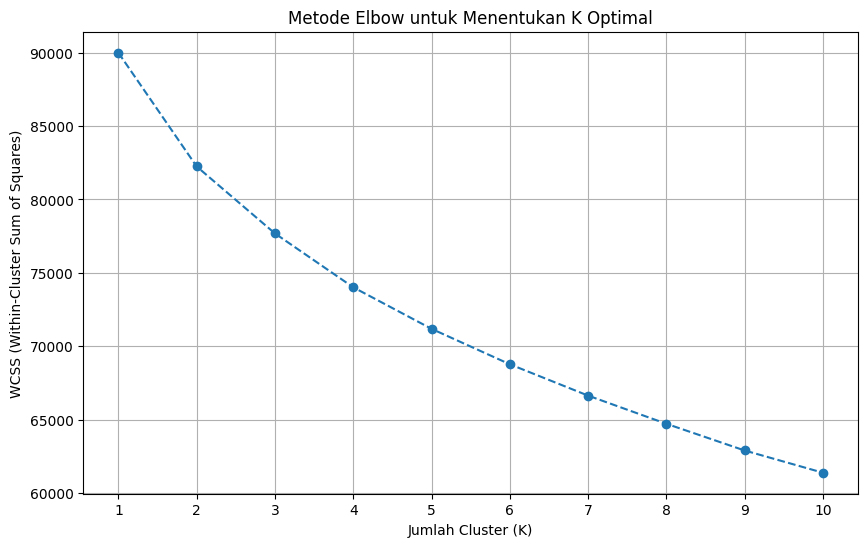

Grafik Metode Elbow telah ditampilkan. Cari 'siku' pada grafik untuk menentukan K optimal.
Memilih jumlah cluster optimal: K = 4


In [ ]:
print("\n--- Memulai Bagian 4: Menentukan Jumlah Cluster Optimal (Metode Elbow) ---")

wcss = [] # Within-Cluster Sum of Squares
# Menjalankan K-Means untuk K dari 1 hingga 10. Kita bisa memperluas rentang ini jika diperlukan.
for i in range(1, 11):
    # Menggunakan n_init=10 (direkomendasikan Scikit-learn) untuk hasil yang lebih stabil
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ adalah WCSS

# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
print("Grafik Metode Elbow telah ditampilkan. Cari 'siku' pada grafik untuk menentukan K optimal.")

# Berdasarkan observasi visual dari grafik Elbow, tentukan K optimal.
# Contoh, jika siku terlihat jelas di 3 atau 4.
# PENTING: SESUAIKAN NILAI optimal_k INI BERDASARKAN GRAFIK ELBOW YANG KITA LIHAT!
optimal_k = 4 # <--- CONTOH: Jika Anda melihat siku di K=4. Sesuaikan ini!
print(f"Memilih jumlah cluster optimal: K = {optimal_k}")

## Bagian 5: Implementasi K-Means Clustering

Setelah menentukan jumlah cluster optimal (`k`), kita akan menginisialisasi dan melatih model K-Means pada data yang sudah di-scaled. Hasilnya adalah penugasan setiap data poin ke dalam salah satu cluster.

In [ ]:
print(f"\n--- Memulai Bagian 5: Implementasi K-Means Clustering dengan K = {optimal_k} ---")

# Inisialisasi model K-Means dengan K optimal
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Melatih model pada data yang sudah distandarisasi
kmeans.fit(X_scaled)

# Menambahkan label cluster yang dihasilkan oleh K-Means sebagai kolom baru
# ke DataFrame asli (data) dan juga ke DataFrame fitur (X) untuk analisis lebih lanjut.
data['Cluster'] = kmeans.labels_
X['Cluster'] = kmeans.labels_ # Menambahkan ke X juga untuk analisis fitur per cluster

print("Label cluster telah ditambahkan ke dataset asli.")
print(data[['Accident ID', 'Cluster']].head())


--- Memulai Bagian 5: Implementasi K-Means Clustering dengan K = 4 ---
Label cluster telah ditambahkan ke dataset asli.
  Accident ID  Cluster
0    b0dd6f57        2
1    debfad09        1
2    6d69aa36        3
3    425bb1f0        1
4    90d5cf62        2


## Bagian 6: Analisis dan Interpretasi Hasil Clustering

Bagian ini adalah inti dari proyek kita. Kita akan menganalisis karakteristik setiap cluster yang terbentuk dan menginterpretasikannya untuk menjawab pertanyaan-pertanyaan kunci yang telah kita tetapkan:

1.  Apakah terdapat kelompok kecelakaan yang cenderung terjadi pada kondisi cuaca atau jalan tertentu?
2.  Apakah terdapat cluster yang terkait dengan jumlah kendaraan yang terlibat atau tingkat keparahan korban?
3.  Apakah terdapat pola waktu tertentu dalam kecelakaan (berdasarkan jam, hari, atau bulan)?

Kita akan menggunakan ringkasan statistik dan berbagai visualisasi untuk mendukung interpretasi ini.

In [ ]:
print("\n--- Memulai Bagian 6: Analisis dan Interpretasi Hasil Clustering ---")

# 6.1 Ringkasan Ukuran Cluster
print(f"\n6.1 Ukuran Setiap Cluster (Total {optimal_k} Clusters):")
cluster_counts = data['Cluster'].value_counts().sort_index()
print(cluster_counts)
print(f"Total data poin: {len(data)}")


--- Memulai Bagian 6: Analisis dan Interpretasi Hasil Clustering ---

6.1 Ukuran Setiap Cluster (Total 4 Clusters):
Cluster
0    2540
1    2502
2    2494
3    2464
Name: count, dtype: int64
Total data poin: 10000


In [ ]:
# 6.2 Karakteristik Rata-rata/Modus per Cluster

# Untuk fitur numerik: rata-rata
print("\n6.2 Karakteristik Rata-rata Fitur Numerik per Cluster:")
numeric_features_for_summary = ['Latitude', 'Longitude', 'Vehicles Involved', 'Casualties', 'DayOfWeek', 'Month', 'Hour']
cluster_summary_numeric = data.groupby('Cluster')[numeric_features_for_summary].mean()
print(cluster_summary_numeric)

# Untuk fitur kategorikal (setelah di-encode): kita bisa melihat modus atau mengembalikan ke label asli untuk interpretasi.
# Untuk interpretasi yang mudah, mari kita lihat modus dari fitur kategorikal asli per cluster.
print("\n  Modus Fitur Kategorikal (Asli) per Cluster:")
categorical_features_original = ['Weather Condition', 'Road Condition']
for cluster_id in sorted(data['Cluster'].unique()):
    print(f"\n  Cluster {cluster_id}:")
    for feature in categorical_features_original:
        # Mengambil modus (nilai yang paling sering muncul)
        mode_val = data[data['Cluster'] == cluster_id][feature].mode()[0]
        count_mode = data[data['Cluster'] == cluster_id][feature].value_counts().max()
        total_in_cluster = len(data[data['Cluster'] == cluster_id])
        print(f"    {feature}: '{mode_val}' (Terjadi {count_mode} kali dari {total_in_cluster}, atau {((count_mode/total_in_cluster)*100):.2f}%)")

# Tambahan: Melihat distribusi Cause (asli) per cluster untuk insight, meskipun Cause tidak digunakan sebagai input clustering
print("\n  Distribusi 'Cause' per Cluster (untuk Insight Tambahan):")
for cluster_id in sorted(data['Cluster'].unique()):
    print(f"\n  Cluster {cluster_id}:")
    cause_dist = data[data['Cluster'] == cluster_id]['Cause'].value_counts(normalize=True).round(2)
    print(cause_dist)


6.2 Karakteristik Rata-rata Fitur Numerik per Cluster:
          Latitude  Longitude  Vehicles Involved  Casualties  DayOfWeek  \
Cluster                                                                   
0       -49.048145   1.315761           1.913780    4.304724   2.967717   
1         9.518520   6.016579           4.206635    2.133493   3.111910   
2        -8.414287  -5.355711           4.077386    8.070168   3.030473   
3        47.206418  -0.670713           1.800325    5.471997   2.965909   

            Month       Hour  
Cluster                       
0        6.495276  12.205512  
1        6.772982  11.807754  
2        6.350842  10.598637  
3        6.523133  11.169643  

  Modus Fitur Kategorikal (Asli) per Cluster:

  Cluster 0:
    Weather Condition: 'Storm' (Terjadi 504 kali dari 2540, atau 19.84%)
    Road Condition: 'Wet' (Terjadi 474 kali dari 2540, atau 18.66%)

  Cluster 1:
    Weather Condition: 'Hail' (Terjadi 449 kali dari 2502, atau 17.95%)
    Road Condition:


6.3 Visualisasi Cluster untuk Menjawab Pertanyaan Kunci:


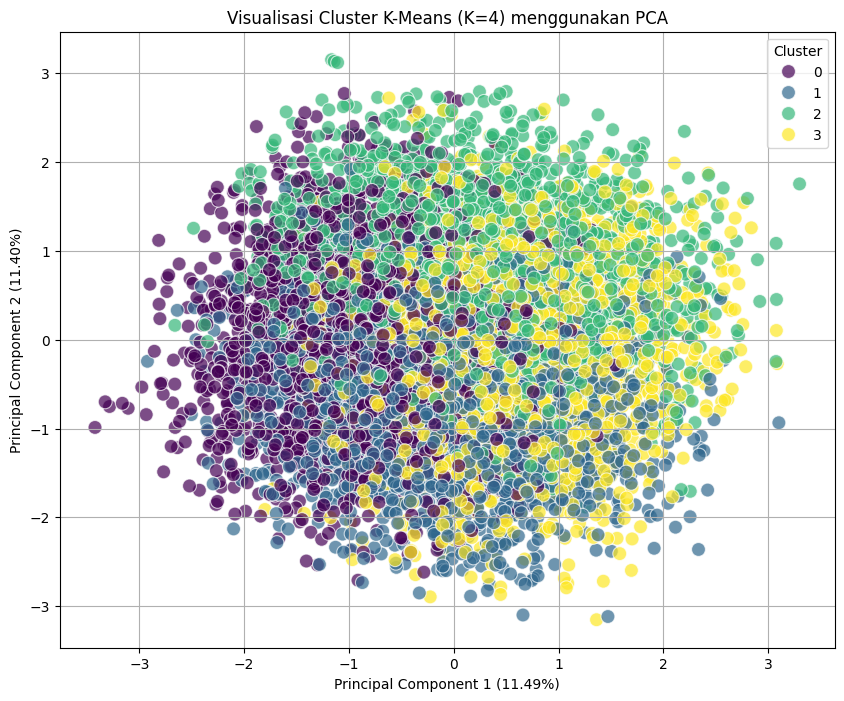

Scatter plot cluster menggunakan PCA telah ditampilkan. Komponen utama menjelaskan variasi data.


In [ ]:
# 6.3 Visualisasi Cluster

print("\n6.3 Visualisasi Cluster untuk Menjawab Pertanyaan Kunci:")

# Visualisasi PCA (Principal Component Analysis) untuk melihat pemisahan cluster secara umum
# Mereduksi dimensi data yang sudah di-scaled ke 2 komponen utama untuk visualisasi 2D.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster'] # Menambahkan label cluster

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df,
                palette='viridis', s=100, alpha=0.7)
plt.title(f'Visualisasi Cluster K-Means (K={optimal_k}) menggunakan PCA')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()
print("Scatter plot cluster menggunakan PCA telah ditampilkan. Komponen utama menjelaskan variasi data.")

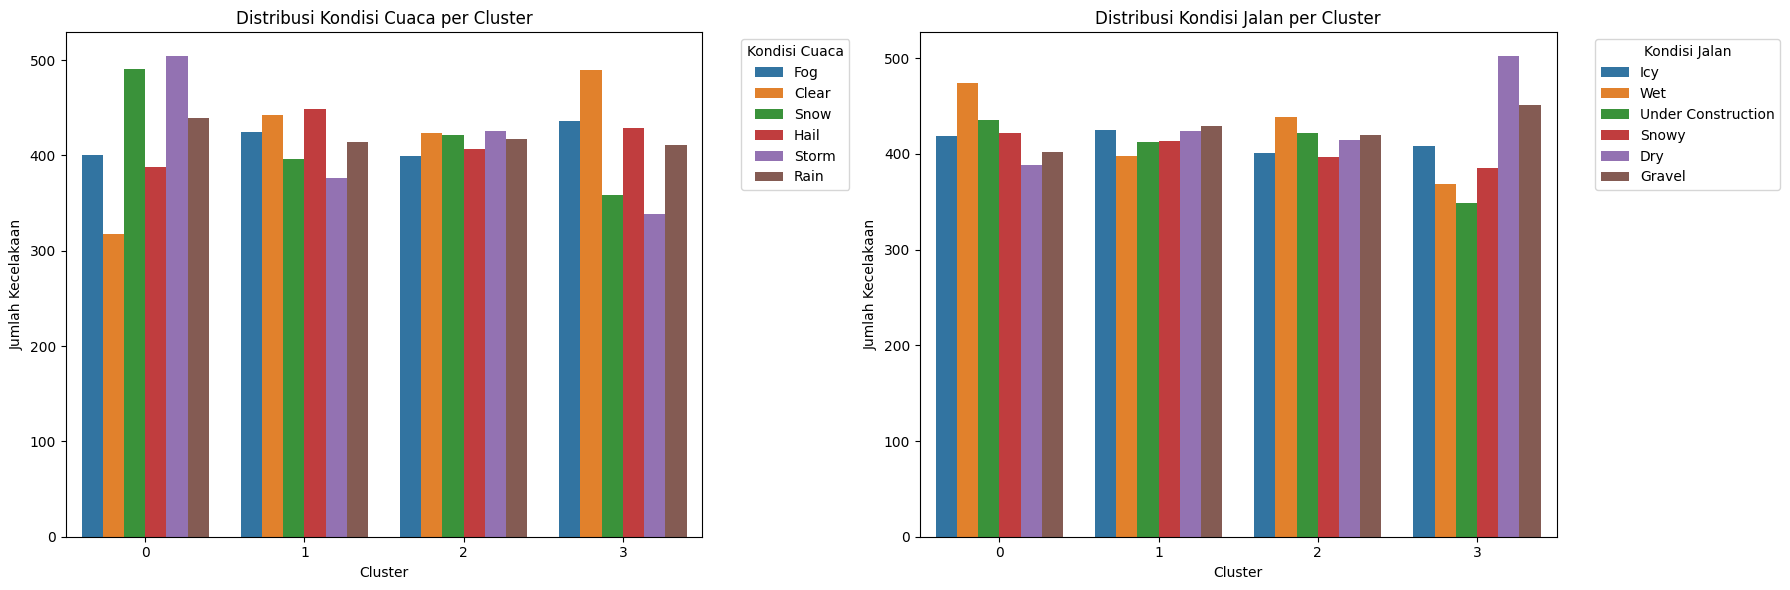


Visualisasi distribusi Kondisi Cuaca dan Jalan per Cluster.


In [ ]:
# Visualisasi Box Plot/Bar Plot untuk menjawab pertanyaan spesifik:

# Pertanyaan 1: Apakah terdapat kelompok kecelakaan yang cenderung terjadi pada kondisi cuaca atau jalan tertentu?
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Cluster', hue='Weather Condition', data=data, palette='tab10')
plt.title('Distribusi Kondisi Cuaca per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Kecelakaan')
plt.legend(title='Kondisi Cuaca', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
sns.countplot(x='Cluster', hue='Road Condition', data=data, palette='tab10')
plt.title('Distribusi Kondisi Jalan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Kecelakaan')
plt.legend(title='Kondisi Jalan', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
print("\nVisualisasi distribusi Kondisi Cuaca dan Jalan per Cluster.")

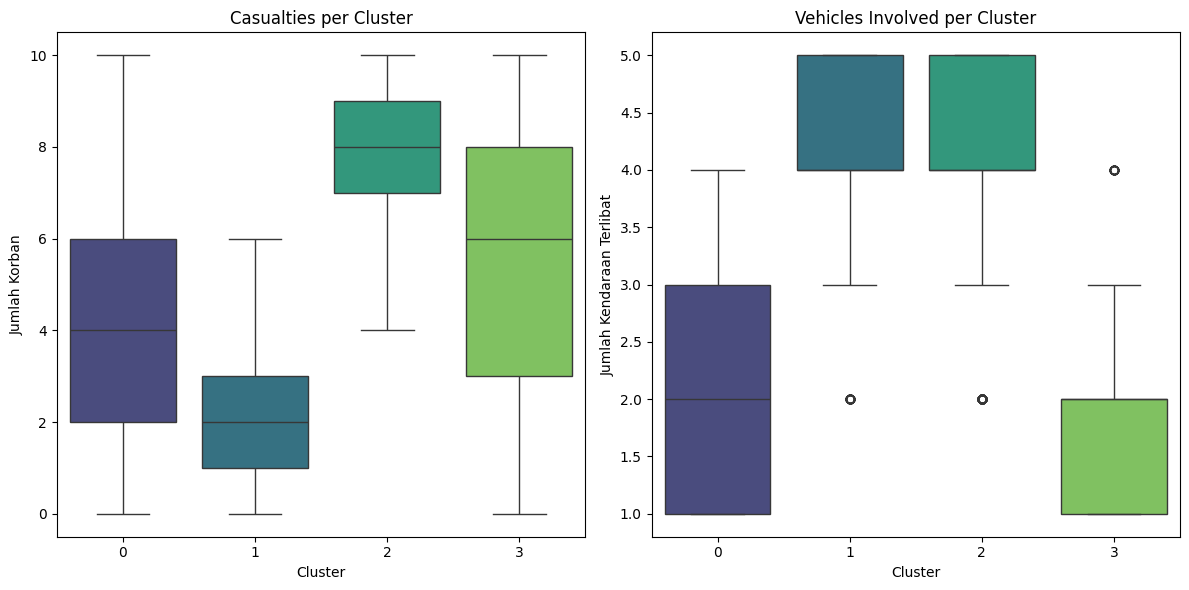

Visualisasi distribusi Jumlah Korban dan Kendaraan Terlibat per Cluster.


In [ ]:
# Pertanyaan 2: Apakah terdapat cluster yang terkait dengan jumlah kendaraan yang terlibat atau tingkat keparahan korban?
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Casualties', data=data, palette='viridis')
plt.title('Casualties per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Korban')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Vehicles Involved', data=data, palette='viridis')
plt.title('Vehicles Involved per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Kendaraan Terlibat')

plt.tight_layout()
plt.show()
print("Visualisasi distribusi Jumlah Korban dan Kendaraan Terlibat per Cluster.")

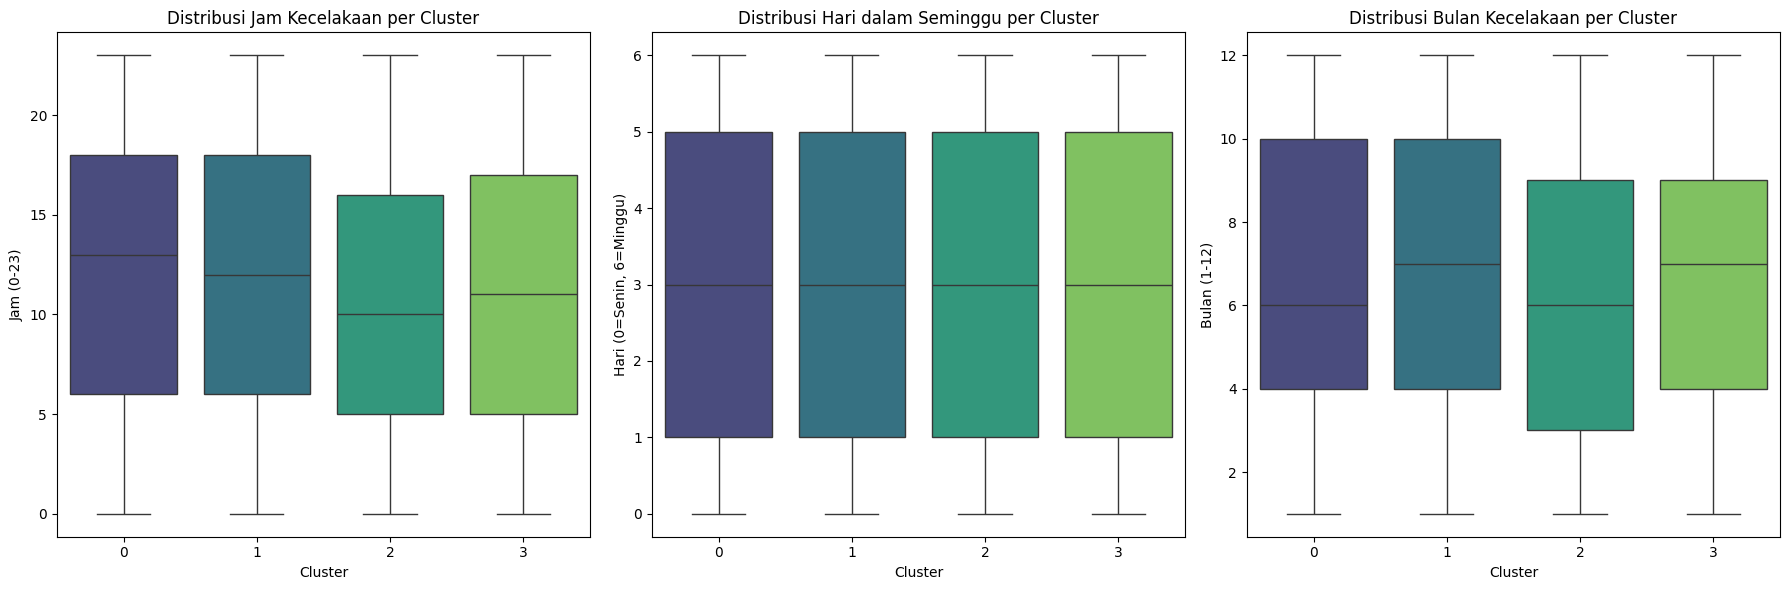

Visualisasi distribusi Jam, Hari dalam Seminggu, dan Bulan per Cluster.


In [ ]:
# Pertanyaan 3: Apakah terdapat pola waktu tertentu dalam kecelakaan (berdasarkan jam, hari, atau bulan)?
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Hour', data=data, palette='viridis')
plt.title('Distribusi Jam Kecelakaan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jam (0-23)')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='DayOfWeek', data=data, palette='viridis')
plt.title('Distribusi Hari dalam Seminggu per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Hari (0=Senin, 6=Minggu)')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Month', data=data, palette='viridis')
plt.title('Distribusi Bulan Kecelakaan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Bulan (1-12)')

plt.tight_layout()
plt.show()
print("Visualisasi distribusi Jam, Hari dalam Seminggu, dan Bulan per Cluster.")

In [ ]:
# 6.4 Evaluasi Kuantitatif (Silhouette Score)
print("\n6.4 Evaluasi Clustering (Silhouette Score):")
if optimal_k > 1:
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    print(f"Rata-rata Silhouette Score: {silhouette_avg:.3f}")
    print("Nilai mendekati 1 menunjukkan cluster yang padat dan terpisah dengan baik.")
    print("Nilai mendekati 0 menunjukkan cluster yang tumpang tindih.")
    print("Nilai negatif menunjukkan data yang mungkin berada di cluster yang salah.")
else:
    print("Silhouette Score tidak dapat dihitung untuk K=1.")


6.4 Evaluasi Clustering (Silhouette Score):
Rata-rata Silhouette Score: 0.075
Nilai mendekati 1 menunjukkan cluster yang padat dan terpisah dengan baik.
Nilai mendekati 0 menunjukkan cluster yang tumpang tindih.
Nilai negatif menunjukkan data yang mungkin berada di cluster yang salah.
